In [6]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
np.set_printoptions(suppress=True)

#### Using your store items data:

1) Convert date column to datetime format.

In [7]:
stores = pd.read_csv('stores.csv')
sales = pd.read_csv('sales.csv')
items = pd.read_csv('items.csv')

In [8]:
items_sales = items.merge(sales, left_on='item_id', right_on='item')

In [9]:
merged = items_sales_stores = items_sales.merge(stores, left_on='store', right_on='store_id')

In [10]:
merged.head()

,Unnamed: 0_x,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0_y,item,sale_amount,sale_date,sale_id,store,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [11]:
merged = merged.drop(columns=(['Unnamed: 0', 'Unnamed: 0_y', 'Unnamed: 0_x']))

In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item           913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_date      913000 non-null  object 
 9   sale_id        913000 non-null  int64  
 10  store          913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [13]:
merged.sale_date = pd.to_datetime(merged.sale_date)

In [135]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_brand     913000 non-null  object             
 1   item_id        913000 non-null  int64              
 2   item_name      913000 non-null  object             
 3   item_price     913000 non-null  float64            
 4   item_upc12     913000 non-null  int64              
 5   item_upc14     913000 non-null  int64              
 6   item           913000 non-null  int64              
 7   sale_amount    913000 non-null  float64            
 8   sale_date      913000 non-null  datetime64[ns, UTC]
 9   sale_id        913000 non-null  int64              
 10  store          913000 non-null  int64              
 11  store_address  913000 non-null  object             
 12  store_city     913000 non-null  object             
 13  store_id       913000 non-nul

In [14]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [15]:
merged['sale_date'] = pd.to_datetime(merged['sale_date']).dt.date

In [16]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,2013-01-03,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-04,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,2013-01-05,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


2) Plot the distribution of sale_amount and item_price.

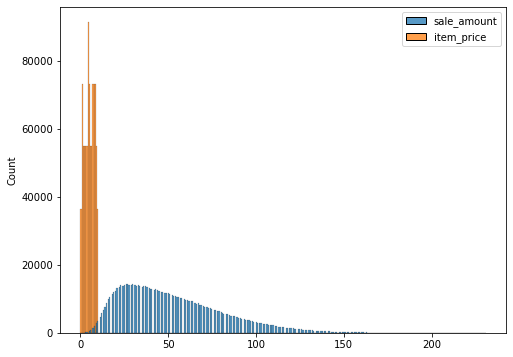

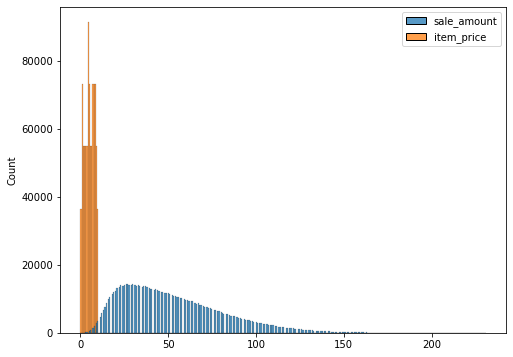

In [37]:
cols = ['sale_amount', 'item_price']
for col in cols:
    sns.histplot(merged[cols])
    plt.show()


3) Set the index to be the datetime variable.

In [78]:
merged = merged.set_index('sale_date').sort_index()
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [79]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item           913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_id        913000 non-null  int64  
 9   store          913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 111.5+ MB


4) Add a 'month' and 'day of week' column to your dataframe.

In [85]:
merged.index = pd.to_datetime(merged.index)

In [91]:
merged['month'] = merged.index.month

In [92]:
merged['day_of_week'] = merged.index.day_name()

In [93]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday
2013-01-01,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday


5) Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [94]:
merged['sales_total'] = merged.sale_amount/merged.item_price

In [95]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,15.476190
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,22.413793
2013-01-01,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,3.319502
2013-01-01,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,10.250569
2013-01-01,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,45.945946


6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Note: prepare.py

#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [20]:
power_df = pd.read_csv('power_df.csv')

In [21]:
power_df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


1) Convert date column to datetime format.

In [22]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


In [23]:
power_df.Date = pd.to_datetime(power_df.Date) 

In [24]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4383 non-null   int64         
 1   Date         4383 non-null   datetime64[ns]
 2   Consumption  4383 non-null   float64       
 3   Wind         2920 non-null   float64       
 4   Solar        2188 non-null   float64       
 5   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


2) Plot the distribution of each of your variables.

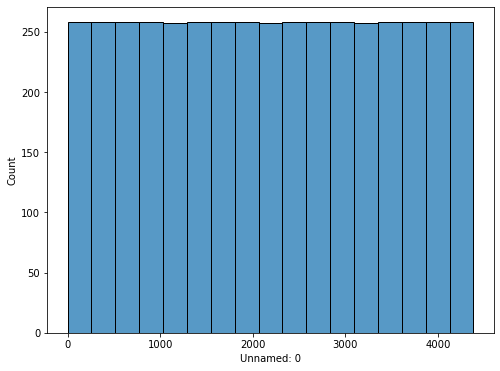

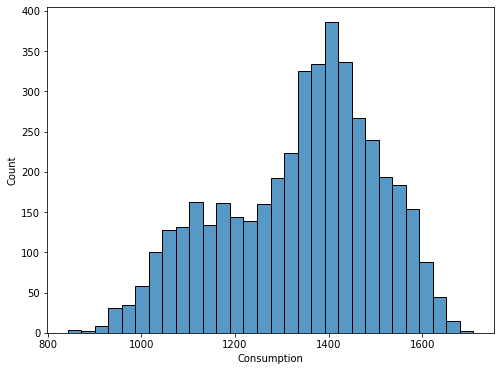

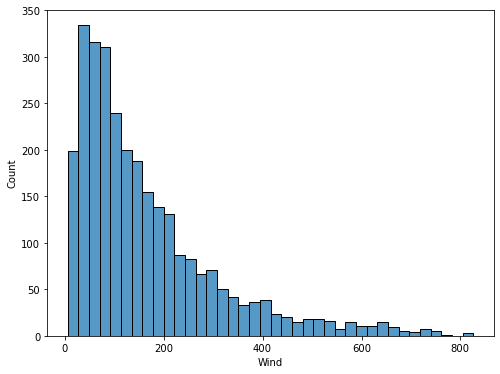

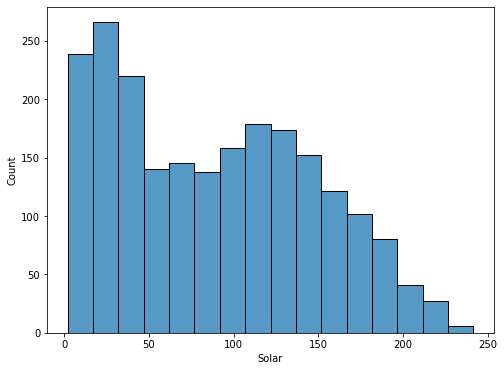

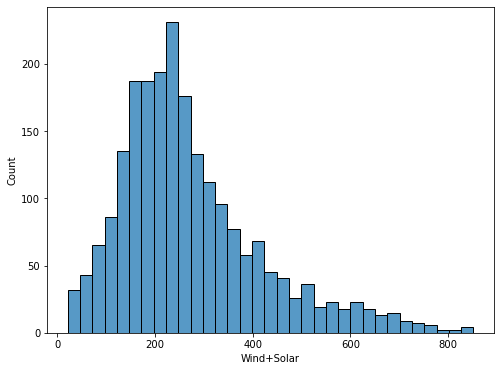

In [27]:
numeric_data = power_df._get_numeric_data()
for i in numeric_data.columns:
    sns.histplot(numeric_data[i])
    plt.show()

3) Set the index to be the datetime variable.

In [28]:
power_df = power_df.set_index('Date').sort_index()

In [29]:
power_df.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN
2006-01-02,1,1380.521,NaN,NaN,NaN
2006-01-03,2,1442.533,NaN,NaN,NaN
2006-01-04,3,1457.217,NaN,NaN,NaN
2006-01-05,4,1477.131,NaN,NaN,NaN


4) Add a month and a year column to your dataframe.

In [30]:
power_df['month'] = power_df.index.month
power_df['year'] = power_df.index.year

In [31]:
power_df.head(100)

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,2,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,3,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,4,1477.131,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...,...
2006-04-06,95,1432.853,NaN,NaN,NaN,4,2006
2006-04-07,96,1394.980,NaN,NaN,NaN,4,2006
2006-04-08,97,1195.959,NaN,NaN,NaN,4,2006


5) Fill any missing values.

In [32]:
power_df.isna().sum()

Unnamed: 0        0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [33]:
power_df.shape

(4383, 7)

In [34]:
power_df = power_df.fillna(0)

Note: too many missing values so decided to fill in with 0s instead of forward/back filling.  

6) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Note: prepare.py